# NASA International Space Apps Challenge
> Team: Space Visionaries

> Challenge: Visualizing a space mission using virtual reality

> Date: October 2023

# 0 - Imports

In [243]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
import random
from random import uniform

# 1 - Orbits of main planets

The first step in the first part of the challenge is to determine the physical parameters of the orbits of the planets. In order to do that, we'll begin by checking the relevant geometrical parameters from adequate databases, and then calculating the remaining ones. Our goal is to have the center, semi-major axis radius and semi-minor axis radius of each ellipse.

The data for all radii and masses are from the book "Orbital Mechanics for Engineering Students" by Howard Curtis, and the rest is from https://nssdc.gsfc.nasa.gov/planetary/factsheet/.

In [150]:
# Each list is ordered according to the position in the solar system,
# [sun, mercury, venus, earth, moon, mars, jupiter, saturn, uranus, neptune]

r = np.array([696000, 2440, 6052, 6378, 1737, 3398, 71490, 60270, 25560, 24760])/1496000000 # radius, AU
m = np.array([1.989e+30, 330.2e+21, 4.869e+24, 5.974e+24, 73.48e+21, 641.9e+21, 1.899e+27, 568.5e+24, 86.83e+24, 102.4e+24, 12.5e+21]) # mass, kg
D = np.array([607.45, 1407.6, -5832.5, 23.9, 655.7, 24.6, 9.9, 10.7, -17.2, 16.1]) # day, hours, with respect to the universe
p = np.array([0, 46, 107.5, 147.1, 0.363, 206.7, 740.6, 1357.6, 2732.7, 4471.1])*10e+6/1496000000 # perihelion, AU, with Moon's value displaced with respect to the Sun
p = -p
a = np.array([0, 69.8, 108.9, 152.1, 0.406, 249.3, 816.4, 1506.5, 3001.4, 4558.9])*10e+6/1496000000 # aphelion, AU, with Moon's value displaced with respect to the Sun
T = np.array([0, 88, 224.7, 365.2, 27.3, 687, 4331, 10747, 30589, 59800]) # period, days
e = np.array([0, 0.206, 0.007, 0.017, 0.055, 0.094, 0.049, 0.052, 0.047, 0.010, 0.244]) # eccentricty, ad.


In [151]:
# Finding the geometrical parameters of the ellipse

c = a + p # center of ellipse, in AU
r_axis = (a-p)/2 # length of ellipse radius along x-axis
r_perp = [r_axis[i]*np.sqrt(1-e[i]**2) for i in range(len(a))] # length of ellipse radius along y-axis

print(c)
print(r_axis)
print(r_perp)

[0.00000000e+00 1.59090909e-01 9.35828877e-03 3.34224599e-02
 2.87433155e-04 2.84759358e-01 5.06684492e-01 9.95320856e-01
 1.79612299e+00 5.86898396e-01]
[0.00000000e+00 3.87032086e-01 7.23262032e-01 1.00000000e+00
 2.57018717e-03 1.52406417e+00 5.20387701e+00 9.57252674e+00
 1.91647727e+01 3.01804813e+01]
[0.0, 0.37873101808703225, 0.7232443119487011, 0.9998554895583661, 0.002566296813379848, 1.5173159156429936, 5.197625996579713, 9.559575921139778, 19.14359353311911, 30.1789722216308]


Now all of the plots will be done. First of all, we simply show the individual orbits with the derived parameters.

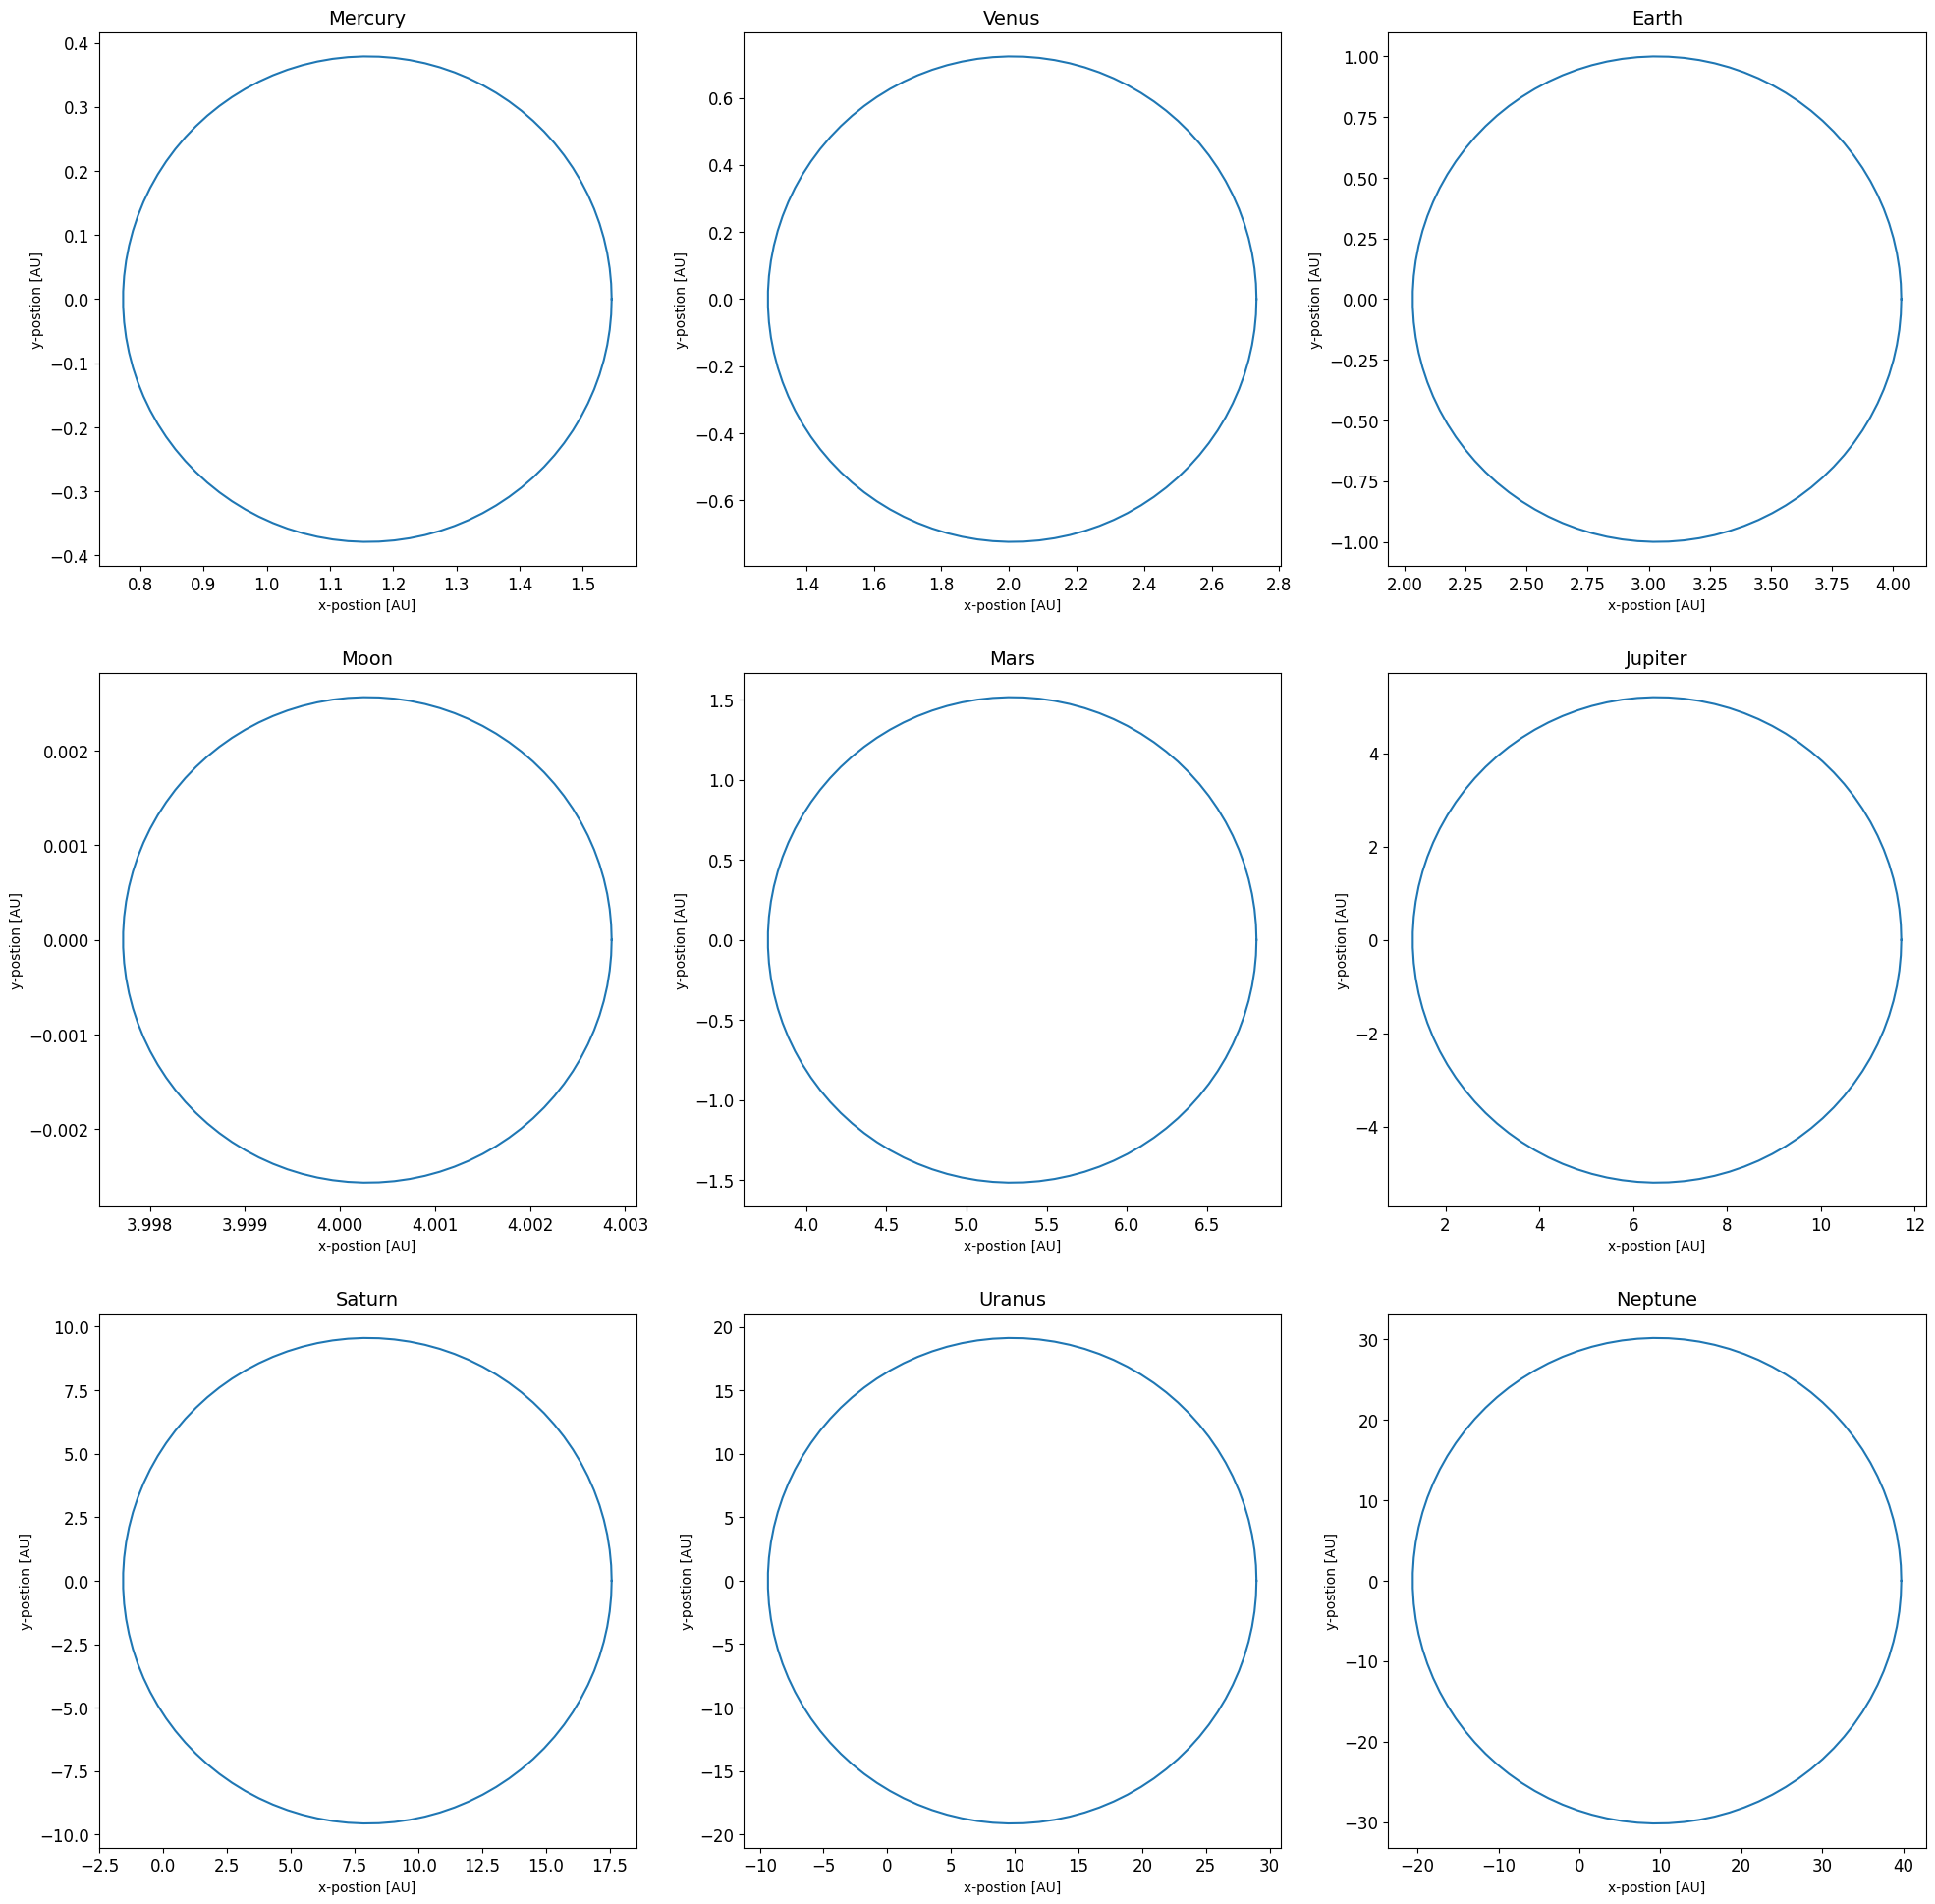

In [152]:
# Plot of all individual orbits

fig, axes = plt.subplots(3,3,figsize=(24,24), squeeze=False)
t = np.linspace(0,2*np.pi, 100)

def plotting(i,j,pos,orb,planet:str): # coordinates of the plot, number of planet in list, number of planet it revolves around
  ax = axes[i][j]
  ax.plot(orb+c[pos]+pos+r_axis[pos]*np.cos(t), r_perp[pos]*np.sin(t))
  ax.tick_params(axis='both', labelsize=12)
  ax.set_title(planet, fontsize=14)
  ax.set_ylabel('y-postion [AU]', fontsize=10)
  ax.set_xlabel('x-postion [AU]', fontsize=10)

plotting(0,0,1,0,'Mercury')
plotting(0,1,2,0,'Venus')
plotting(0,2,3,0,'Earth')
plotting(1,0,4,0,'Moon')
plotting(1,1,5,0,'Mars')
plotting(1,2,6,0,'Jupiter')
plotting(2,0,7,0,'Saturn')
plotting(2,1,8,0,'Uranus')
plotting(2,2,9,0,'Neptune')

plt.show()

We will now combine them together and do a sanity check. In order to simplify and allow further implementations, the approximations we used were:

1. that all orbits are coplanar and
2. their apse lines are colinear (along the x-axis)

while the Sun is at (0,0). Furthermore, for this first version, the center of Moon's orbit is near Earth's aphelion.

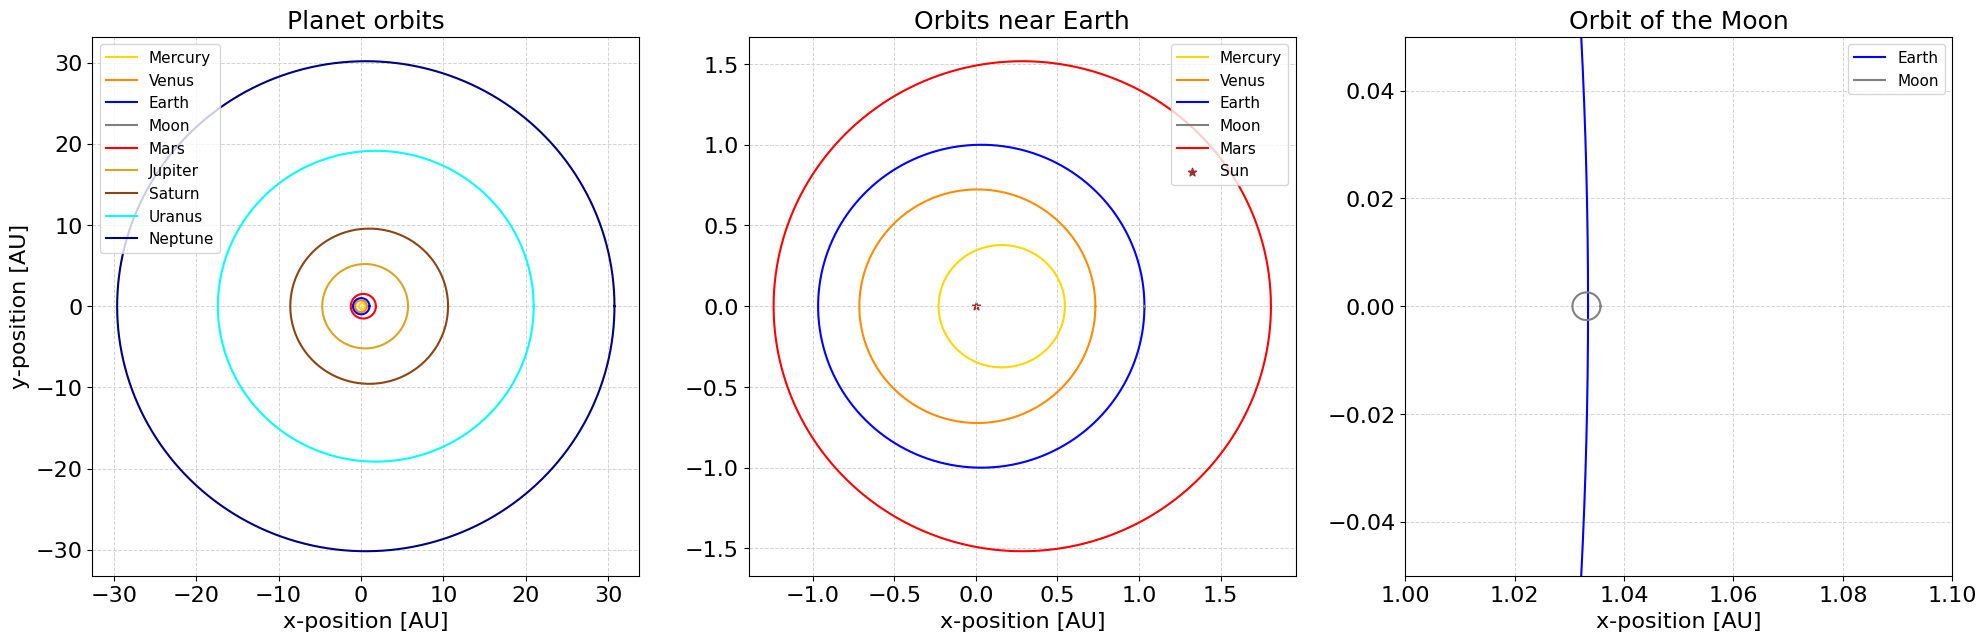

In [242]:
fig, axes = plt.subplots(1,3,figsize=(24,7), squeeze=False)
t = np.linspace(0,2*np.pi, 1000)
pos_earth = c[3]+r_axis[3]*np.cos(t) # auxiliary variable to place the Moon with respect to the position of the Earth

ax = axes[0][0]
ax.plot(c[1]+r_axis[1]*np.cos(t), r_perp[1]*np.sin(t), label='Mercury', color='gold')
ax.plot(c[2]+r_axis[2]*np.cos(t), r_perp[2]*np.sin(t), label='Venus', color='darkorange')
ax.plot(c[3]+r_axis[3]*np.cos(t), r_perp[3]*np.sin(t), label='Earth', color='blue')
ax.plot(c[4]+r_axis[4]*np.cos(t), r_perp[4]*np.sin(t), label='Moon', color='gray')
ax.plot(c[5]+r_axis[5]*np.cos(t), r_perp[5]*np.sin(t), label='Mars', color='red')
ax.plot(c[6]+r_axis[6]*np.cos(t), r_perp[6]*np.sin(t), label='Jupiter', color='goldenrod')
ax.plot(c[7]+r_axis[7]*np.cos(t), r_perp[7]*np.sin(t), label='Saturn', color='saddlebrown')
ax.plot(c[8]+r_axis[8]*np.cos(t), r_perp[8]*np.sin(t), label='Uranus', color='cyan')
ax.plot(c[9]+r_axis[9]*np.cos(t), r_perp[9]*np.sin(t), label='Neptune', color='navy')
ax.set_title('Planet orbits', size=18)
ax.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=11)
ax.grid(color='lightgray', ls='dashed', lw=0.7)
ax.set_ylabel('y-position [AU]', fontsize=16)
ax.set_xlabel('x-position [AU]', fontsize=16)

ax = axes[0][1]
ax.plot(c[1]+r_axis[1]*np.cos(t), r_perp[1]*np.sin(t), label='Mercury', color='gold')
ax.plot(c[2]+r_axis[2]*np.cos(t), r_perp[2]*np.sin(t), label='Venus', color='darkorange')
ax.plot(pos_earth, r_perp[3]*np.sin(t), label='Earth', color='blue')
ax.plot(max(pos_earth)-c[4]+r_axis[4]*np.cos(t), r_perp[4]*np.sin(t), label='Moon', color='gray')
ax.plot(c[5]+r_axis[5]*np.cos(t), r_perp[5]*np.sin(t), label='Mars', color='red')
ax.scatter(0,0, marker='*', color='brown', label='Sun')
ax.set_title('Orbits near Earth', size=18)
ax.tick_params(axis='both', labelsize=16)
# ax.set_xlim(-20,20)
# ax.set_ylim(-20,20)
ax.legend(fontsize=11)
ax.grid(color='lightgray', ls='dashed', lw=0.7)
ax.set_xlabel('x-position [AU]', fontsize=16)

ax = axes[0][2]
ax.plot(pos_earth, r_perp[3]*np.sin(t), label='Earth', color='blue')
ax.plot(max(pos_earth)-c[4]+r_axis[4]*np.cos(t), r_perp[4]*np.sin(t), label='Moon', color='gray')
ax.set_title('Orbit of the Moon', size=18)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlim(1,1.1)
ax.set_ylim(-0.05,0.05)
ax.legend(fontsize=11)
ax.grid(color='lightgray', ls='dashed', lw=0.7)
ax.set_xlabel('x-position [AU]', fontsize=16)

plt.show()

We can thus write the dictionaries that will be used in the project within a list:

In [98]:
mercury = {'center':c[1], 'major_radius':r_axis[1], 'minor_radius':r_perp[1]}
venus = {'center':c[2], 'major_radius':r_axis[2], 'minor_radius':r_perp[2]}
earth = {'center':c[3], 'major_radius':r_axis[3], 'minor_radius':r_perp[3]}
moon = {'center':max(pos_earth)-c[4], 'major_radius':r_axis[4], 'minor_radius':r_perp[4]}
mars = {'center':c[5], 'major_radius':r_axis[5], 'minor_radius':r_perp[5]}
jupiter = {'center':c[6], 'major_radius':r_axis[6], 'minor_radius':r_perp[6]}
saturn = {'center':c[7], 'major_radius':r_axis[7], 'minor_radius':r_perp[7]}
uranus = {'center':c[8], 'major_radius':r_axis[8], 'minor_radius':r_perp[8]}
neptune = {'center':c[9], 'major_radius':r_axis[9], 'minor_radius':r_perp[9]}

orbits = [mercury, venus, earth, moon, mars, jupiter, saturn, uranus, neptune]

print(orbits)

[{'center': 0.15909090909090906, 'major_radius': 0.3870320855614973, 'minor_radius': 0.37873101808703225}, {'center': 0.009358288770053402, 'major_radius': 0.7232620320855615, 'minor_radius': 0.7232443119487011}, {'center': 0.03342245989304804, 'major_radius': 1.0, 'minor_radius': 0.9998554895583661}, {'center': 1.0331350267379678, 'major_radius': 0.002570187165775401, 'minor_radius': 0.002566296813379848}, {'center': 0.2847593582887702, 'major_radius': 1.5240641711229945, 'minor_radius': 1.5173159156429936}, {'center': 0.5066844919786098, 'major_radius': 5.203877005347593, 'minor_radius': 5.197625996579713}, {'center': 0.995320855614974, 'major_radius': 9.572526737967914, 'minor_radius': 9.559575921139778}, {'center': 1.796122994652407, 'major_radius': 19.164772727272727, 'minor_radius': 19.14359353311911}, {'center': 0.5868983957219243, 'major_radius': 30.18048128342246, 'minor_radius': 30.1789722216308}]


# 2 - Orbits of dwarf planets

Besides the well known planets, our solar system also has several dwarf planets going around the Sun. They are: Ceres, Pluto, Makemake, Haumea and Eris. The first of all, Ceres, has its orbit near the Asteroid Belt between Mars and Jupiter, while the other follow the Kuiper Belt.

The data for all their parameters was taken from https://www.princeton.edu/~willman/planetary_systems/Sol/

In [99]:
# Each list is ordered according to the position in the solar system,
# [ceres, pluto, haumea, makemake, eris]

smajor_axis = np.array([2.7658, 39.4821, 43.34, -45.79, 67.67]) # semi-major axis, in AU
ecc = np.array([0.078, 0.24883, 0.189, 0.159, 0.44177]) # eccentricity, ad.
mass = np.array([0.00016, 0.00220, 0.00070, 0.0007, 0.00278])*5.9742e+24 # mass, in kg

In [100]:
# Finding the geometrical parameters of the ellipse

cent = smajor_axis*ecc # center of ellipse, in AU
sminor_axis = [smajor_axis[i]*np.sqrt(1-ecc[i]**2) for i in range(len(ecc))] # length of ellipse radius along y-axis, in AU

print(cent)
print(smajor_axis)
print(sminor_axis)

[ 0.2157324   9.82433094  8.19126    -7.28061    29.8945759 ]
[  2.7658  39.4821  43.34   -45.79    67.67  ]
[2.7573736002925395, 38.24027643640162, 42.55888696397499, -45.20748630512318, 60.708675094743576]


We again do a sanity check to see of their orbits are according to what was expected, assuming the same approximations as for the planets. Since their orbits are not perfectly clear, we'll use this image for a rough approximation: https://twitter.com/NASA/status/1079070296961880064?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1079070296961880064%7Ctwgr%5E7510534f3df8674fe88f5418f065ae142171642b%7Ctwcon%5Es1_c10&ref_url=https%3A%2F%2Fewn.co.za%2F2018%2F12%2F31%2Fnasa-spaceship-zooms-toward-farthest-world-ever-photographed

Furthermore, in order to illustrate the orbit of Ceres, which is the closest dwarf planet ot Earth, we'll include the Asteroid Belt in the plot, for simple visualization. Due to its interaction complexity and time restraints, we won't implement it in the real model.

We'll use as a reference https://science.nasa.gov/resource/asteroid-belt/.

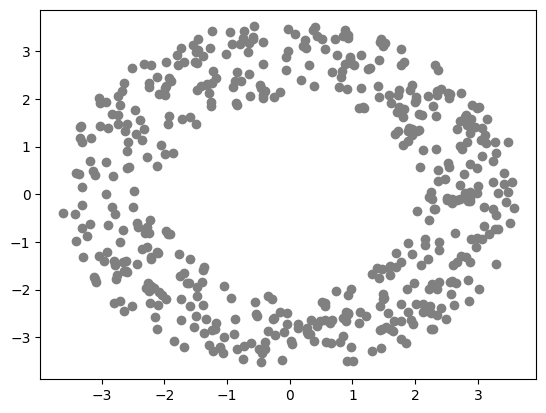

In [219]:
def asteroids():
    circle = False
    while circle == False:
        belt_r = 4.
        r = np.array([uniform(-belt_r, belt_r), uniform(-belt_r, belt_r)])
        if (r[0]**2+r[1]**2 < 3.65**2) and (r[0]**2+r[1]**2 > 2.05**2):
            circle = True
        else:
            circle = False
    return r[0], r[1]

num = 500

x = np.zeros(num)
y = np.zeros(num)
for i in range(num):
    x[i], y[i] = asteroids()
plt.scatter(x,y, color='gray')
plt.show()

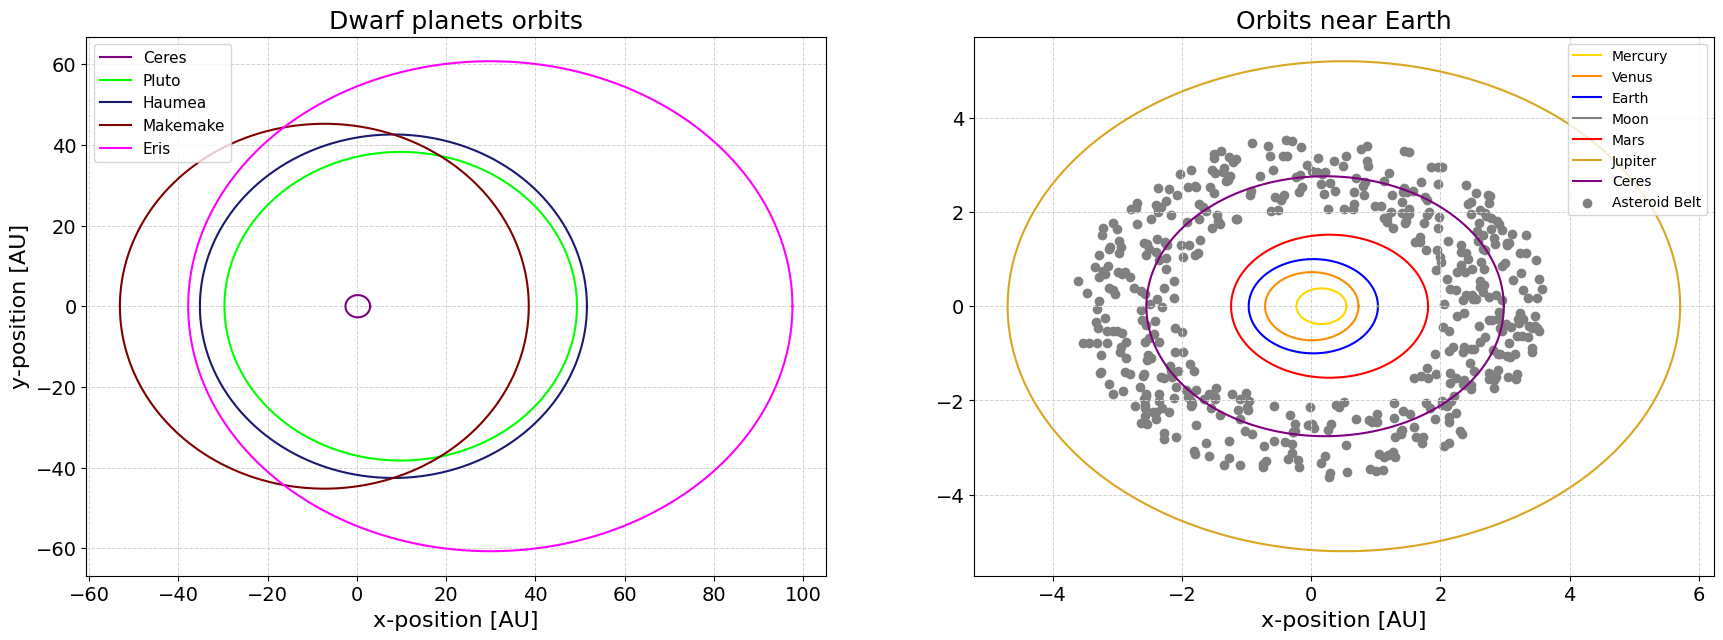

In [222]:
fig, axes = plt.subplots(1,2,figsize=(21,7), squeeze=False)
time = np.linspace(0,2*np.pi, 1000)

ax = axes[0][0]
ax.plot(cent[0]+smajor_axis[0]*np.cos(time), sminor_axis[0]*np.sin(time), label='Ceres', color='purple')
ax.plot(cent[1]+smajor_axis[1]*np.cos(time), sminor_axis[1]*np.sin(time), label='Pluto', color='lime')
ax.plot(cent[2]+smajor_axis[2]*np.cos(time), sminor_axis[2]*np.sin(time), label='Haumea', color='midnightblue')
ax.plot(cent[3]+smajor_axis[3]*np.cos(time), sminor_axis[3]*np.sin(time), label='Makemake', color='maroon')
ax.plot(cent[4]+smajor_axis[4]*np.cos(time), sminor_axis[4]*np.sin(time), label='Eris', color='magenta')
ax.set_title('Dwarf planets orbits', size=18)
ax.tick_params(axis='both', labelsize=14)
ax.legend(fontsize=11)
ax.grid(color='lightgray', ls='dashed', lw=0.7)
ax.set_ylabel('y-position [AU]', fontsize=16)
ax.set_xlabel('x-position [AU]', fontsize=16)

ax = axes[0][1]
ax.plot(c[1]+r_axis[1]*np.cos(t), r_perp[1]*np.sin(t), label='Mercury', color='gold')
ax.plot(c[2]+r_axis[2]*np.cos(t), r_perp[2]*np.sin(t), label='Venus', color='darkorange')
ax.plot(pos_earth, r_perp[3]*np.sin(t), label='Earth', color='blue')
ax.plot(max(pos_earth)-c[4]+r_axis[4]*np.cos(t), r_perp[4]*np.sin(t), label='Moon', color='gray')
ax.plot(c[5]+r_axis[5]*np.cos(t), r_perp[5]*np.sin(t), label='Mars', color='red')
ax.plot(c[6]+r_axis[6]*np.cos(t), r_perp[6]*np.sin(t), label='Jupiter', color='goldenrod')
ax.plot(cent[0]+smajor_axis[0]*np.cos(time), sminor_axis[0]*np.sin(time), label='Ceres', color='purple')
for i in range(num):
    x[i], y[i] = asteroids()
plt.scatter(x,y, color='gray', label='Asteroid Belt')
ax.set_title('Orbits near Earth', size=18)
ax.tick_params(axis='both', labelsize=14)
ax.legend(fontsize=10)
ax.grid(color='lightgray', ls='dashed', lw=0.7)
ax.set_xlabel('x-position [AU]', fontsize=16)

plt.show()

Again, we build the dictionaries that with the data that will be used in the implementation of the problem.

In [114]:
ceres = {'center':cent[0], 'semimajoraxis':smajor_axis[0], 'semiminoraxis':sminor_axis[0]}
pluto = {'center':cent[1], 'semimajoraxis':smajor_axis[1], 'semiminoraxis':sminor_axis[1]}
haumea = {'center':cent[2], 'semimajoraxis':smajor_axis[2], 'semiminoraxis':sminor_axis[2]}
makemake = {'center':cent[3], 'semimajoraxis':smajor_axis[3], 'semiminoraxis':sminor_axis[3]}
eris = {'center':cent[4], 'semimajoraxis':smajor_axis[4], 'semiminoraxis':sminor_axis[4]}

dwarf_planets = [ceres, pluto, haumea, makemake, eris]

print(dwarf_planets)

[{'center': 0.2157324, 'semimajoraxis': 2.7658, 'semiminoraxis': 2.7573736002925395}, {'center': 9.824330943, 'semimajoraxis': 39.4821, 'semiminoraxis': 38.24027643640162}, {'center': 8.191260000000002, 'semimajoraxis': 43.34, 'semiminoraxis': 42.55888696397499}, {'center': -7.28061, 'semimajoraxis': -45.79, 'semiminoraxis': -45.20748630512318}, {'center': 29.8945759, 'semimajoraxis': 67.67, 'semiminoraxis': 60.708675094743576}]


# 3 - 3D orbits of planets

For a last visualization, we will plot all the orbits in three dimensions. This will be done without their respective inclinations, again for simplification.

This step is important so we can have an intuition of the validity of our equation to determine the velocity of the planets.

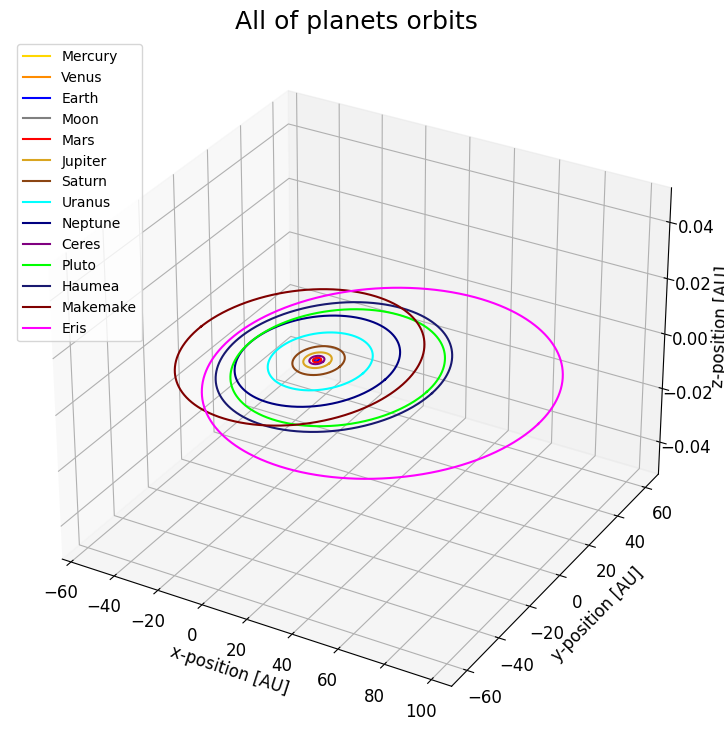

In [158]:
time = np.linspace(0,2*np.pi, 1000)
fig = plt.figure(figsize=(21,9))
ax = plt.axes(projection='3d')

#planets
ax.plot(c[1]+r_axis[1]*np.cos(t), r_perp[1]*np.sin(t), label='Mercury', color='gold')
ax.plot(c[2]+r_axis[2]*np.cos(t), r_perp[2]*np.sin(t), label='Venus', color='darkorange')
ax.plot(c[3]+r_axis[3]*np.cos(t), r_perp[3]*np.sin(t), label='Earth', color='blue')
ax.plot(c[4]+r_axis[4]*np.cos(t), r_perp[4]*np.sin(t), label='Moon', color='gray')
ax.plot(c[5]+r_axis[5]*np.cos(t), r_perp[5]*np.sin(t), label='Mars', color='red')
ax.plot(c[6]+r_axis[6]*np.cos(t), r_perp[6]*np.sin(t), label='Jupiter', color='goldenrod')
ax.plot(c[7]+r_axis[7]*np.cos(t), r_perp[7]*np.sin(t), label='Saturn', color='saddlebrown')
ax.plot(c[8]+r_axis[8]*np.cos(t), r_perp[8]*np.sin(t), label='Uranus', color='cyan')
ax.plot(c[9]+r_axis[9]*np.cos(t), r_perp[9]*np.sin(t), label='Neptune', color='navy')
#dwarfs
ax.plot(cent[0]+smajor_axis[0]*np.cos(time), sminor_axis[0]*np.sin(time), label='Ceres', color='purple')
ax.plot(cent[1]+smajor_axis[1]*np.cos(time), sminor_axis[1]*np.sin(time), label='Pluto', color='lime')
ax.plot(cent[2]+smajor_axis[2]*np.cos(time), sminor_axis[2]*np.sin(time), label='Haumea', color='midnightblue')
ax.plot(cent[3]+smajor_axis[3]*np.cos(time), sminor_axis[3]*np.sin(time), label='Makemake', color='maroon')
ax.plot(cent[4]+smajor_axis[4]*np.cos(time), sminor_axis[4]*np.sin(time), label='Eris', color='magenta')

ax.set_title('All of planets orbits', size=18)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=10, loc='upper left')
ax.grid(color='lightgray', ls='dashed', lw=0.7)
ax.set_zlabel('z-position [AU]', fontsize=12)
ax.set_ylabel('y-position [AU]', fontsize=12)
ax.set_xlabel('x-position [AU]', fontsize=12)

plt.show()

# 4 - Velocity of the planets (Keplerian orbits)

In order to implement the planets motion in thei respective orbits, as well as their interation with one another, we'll describe their motion using conservation of mechanical energy in keplerian orbits. To do that, we assume the equation of energy of an orbit in polar coordinates:

$$\displaystyle \frac{v^2}{2} - \frac{\mu}{r} = \text{const}$$

where $\mu$ is the standard gravitational parameter of the planet. For an ellipse, the total energy is given in terms of $\mu$ and the semi-major axis radius $a$,

$$\displaystyle \varepsilon = - \frac{\mu}{2a}$$

$$\displaystyle \therefore \frac{v^2}{2} - \frac{\mu}{r} = -\frac{\mu}{2a}$$

Writing in terms of the velocity and for cartesian coordinates,

$$\displaystyle \frac{v^2}{2} = \mu \left( \frac{1}{r} - \frac{1}{2a} \right) \; \Rightarrow \; \boxed{v = \sqrt{\mu\left( \frac{2}{\sqrt{x^2+y^2+z^2}} - \frac{1}{a} \right)}}$$

The values of $\mu$ were taken from the book "Orbital Mechanics for Engineering Students" by Howard Curtis, Table A.2.

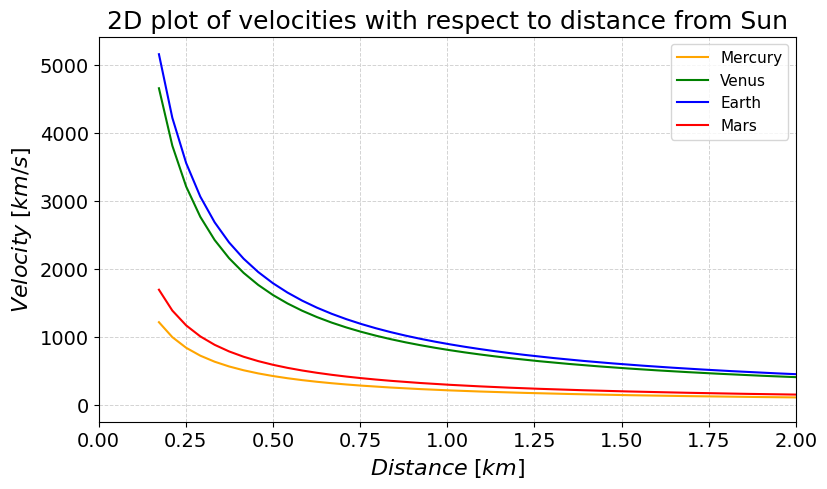

In [244]:
def velocity(x,y,z,mu,a):
  return np.sqrt(mu*((2/(x**2+y**2+z**2)) - (1/a)))

x = np.linspace(0.1,30,1000)
y = np.linspace(0.1,30,1000)
z = np.linspace(0.1,5,1000)

fig, axes = plt.subplots(1,1,figsize=(9,5), squeeze=False)

ax = axes[0][0]
ax.plot(np.sqrt(x**2+y**2+z**2), velocity(x,y,z,22030,579000000.0), label='Mercury', color='orange')
ax.plot(np.sqrt(x**2+y**2+z**2), velocity(x,y,z,324900,1082000000.0), label='Venus', color='green')
ax.plot(np.sqrt(x**2+y**2+z**2), velocity(x,y,z,398600,1496000000.0), label='Earth', color='blue')
ax.plot(np.sqrt(x**2+y**2+z**2), velocity(x,y,z,42828,2280000000.0), label='Mars', color='red')
ax.set_title('2D plot of velocities with respect to distance from Sun', size=18)
ax.tick_params(axis='both', labelsize=14)
ax.grid(color='lightgray', ls='dashed', lw=0.7)
ax.legend(fontsize=11)
ax.set_xlim(0,2)
ax.set_ylabel('$Velocity \; [km/s]$', fontsize=16)
ax.set_xlabel('$Distance \; [km]$', fontsize=16)

plt.show()

Notice that not all plotted positions are possible for all planets shown, since they're restricted to their orbits -- thus it won't happen that the Earth is faster than Mercury.

The plot only confirms a consequence of Kepler's second law: planets are faster the closer they are to the Sun. With this, the conservation of energy can be used to determine the velocity in the model.